# Research Question No. 4
What is the comparative performance of learning algorithms in long-lived bug prediction in FLOSS project? This research question aims to compare the accuracy of the long-lived bug prediction made by different classification algorithms. Here the algorithm with the best prediction capabilities is best fit in terms of balanced accuracy.

# 1. Setup environment.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal

# Setup Matplotlib
plt.rc('figure', figsize=(15, 15))
plt.style.use('default')
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
%matplotlib inline 

# Setup Seaborn
sns.set_context("paper")
sns.set_style("ticks")


pd.set_option('display.max_columns', None)

data_results_path  = "datasets/20200503_long-lived-bug-prediction-w-dnn-results.csv"
bug_reports_path = "datasets/20190917_eclipse_bug_report_data.csv"
print("Setup complete")

Setup complete


# 2. Load data.

In [5]:
!echo "\nHeader of metrics file $data_results_path"
!head -n 2 $data_results_path

!echo "\nNumber of lines in the file $data_results_path"
!wc -l $data_results_path


\nHeader of metrics file datasets/20200503_long-lived-bug-prediction-w-dnn-results.csv
#;project;feature;classifier;balancing;resampling;metric;threshold;train_size;train_size_class_0;train_size_class_1;val_size;val_size_class_0;val_size_class_1;test_size;test_size_class_0;test_size_class_1;loss;tp;fp;tn;fn;accuracy;precision;recall;auc;sensitivity;specificity;balanced_acc;fmeasure;epochs
4;eclipse;short_description;lstm+emb;unbalanced;-;val_auc;8;6300;3113;3187;1576;821;755;1970;1007;963;0,677280962467194;1142;813;1157;828;0,58350253;0,58414322;0,57969540;0,60847485;0,57969543;0,58730964;0,58058440;0,58191081;200
\nNumber of lines in the file datasets/20200503_long-lived-bug-prediction-w-dnn-results.csv
81 datasets/20200503_long-lived-bug-prediction-w-dnn-results.csv


In [12]:
# read metrics data.
data_results = pd.read_csv(data_results_path, sep=';', decimal=',')
rows_and_cols = data_results.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {data_results_path}.\n")

There are 80 rows and 31 columns in datasets/20200503_long-lived-bug-prediction-w-dnn-results.csv.



# 3. First Experiment

## 3.1 Review the data

### Best Balanced Accuracy Scores

In [13]:
data_results.sort_values('balanced_acc', ascending=False).head(10)

,#,project,feature,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
0,4,eclipse,short_description,lstm+emb,unbalanced,-,val_auc,8,6300,3113,3187,1576,821,755,1970,1007,963,0.677281,1142,813,1157,828,0.583503,0.584143,0.579695,0.608475,0.579695,0.587310,0.580584,0.581911,200
1,1,eclipse,short_description,lstm+emb,unbalanced,-,val_acc,8,6300,3113,3187,1576,821,755,1970,1007,963,0.680973,1138,816,1154,832,0.581726,0.582395,0.577665,0.605164,0.577665,0.585787,0.579186,0.580020,200
2,1,eclipse,short_description,lstm+emb,unbalanced,-,val_auc,8,6300,3113,3187,1576,821,755,1970,1007,963,0.681653,1139,831,1139,831,0.578173,0.578173,0.578173,0.607030,0.578173,0.578173,0.576927,0.578173,200
3,2,eclipse,long_description,lstm+emb,unbalanced,-,val_acc,8,6400,3225,3175,1600,795,805,2000,1011,989,0.741118,1138,832,1168,862,0.576500,0.577665,0.569000,0.600391,0.569000,0.584000,0.576574,0.573300,200
4,0,eclipse,short_description,lstm+emb,unbalanced,-,val_auc,8,6300,3113,3187,1576,821,755,1970,1007,963,0.683511,1135,831,1139,835,0.577157,0.577314,0.576142,0.603624,0.576142,0.578173,0.575027,0.576728,200
5,3,eclipse,short_description,lstm+emb,unbalanced,-,val_auc,8,6300,3113,3187,1576,821,755,1970,1007,963,0.677625,1140,843,1127,830,0.575381,0.574887,0.578680,0.599630,0.578680,0.572081,0.573187,0.576777,200
6,4,eclipse,long_description,lstm+emb,unbalanced,-,val_auc,8,6400,3225,3175,1600,795,805,2000,1011,989,0.683659,1135,857,1143,865,0.569500,0.569779,0.567500,0.586710,0.567500,0.571500,0.571411,0.568637,200
7,1,eclipse,long_description,lstm+emb,unbalanced,-,val_auc,8,6400,3225,3175,1600,795,805,2000,1011,989,0.683504,1140,853,1147,860,0.571750,0.572002,0.570000,0.586441,0.570000,0.573500,0.571147,0.570999,200
8,0,eclipse,long_description,lstm+emb,unbalanced,-,val_auc,8,6400,3225,3175,1600,795,805,2000,1011,989,0.712369,1151,855,1145,849,0.574000,0.573779,0.575500,0.597188,0.575500,0.572500,0.571135,0.574638,200
9,4,eclipse,short_description,lstm+emb,unbalanced,-,val_acc,8,6300,3113,3187,1576,821,755,1970,1007,963,0.730180,1120,846,1124,850,0.569543,0.569685,0.568528,0.588705,0.568528,0.570558,0.570573,0.569106,200


In [9]:
#data_results[['feature', 'classifier', 'balancing', 'metric', 'sensitivity', 'specificity', 'balanced_acc']].sort_values('balanced_acc', ascending=False).head(10).to_latex('rq3e1_eclipse_metrics.tex')

### Best Sensitivity Scores

In [14]:
data_results.sort_values('sensitivity', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
61,17,eclipse,short_description,lstm+emb,unbalanced,-,val_acc,365,6300,5815,485,1576,1450,126,1970,1821,149,0.564249,1821,149,1821,149,0.924365,0.924365,0.924365,0.928523,0.924365,0.924365,0.5,0.924365,200
70,16,eclipse,short_description,lstm+emb,unbalanced,-,val_auc,365,6300,5815,485,1576,1450,126,1970,1821,149,0.620091,1821,149,1821,149,0.924365,0.924365,0.924365,0.928016,0.924365,0.924365,0.5,0.924365,200
59,15,eclipse,short_description,lstm+emb,unbalanced,-,val_acc,365,6300,5815,485,1576,1450,126,1970,1821,149,0.591348,1821,149,1821,149,0.924365,0.924365,0.924365,0.929149,0.924365,0.924365,0.5,0.924365,200
60,16,eclipse,short_description,lstm+emb,unbalanced,-,val_acc,365,6300,5815,485,1576,1450,126,1970,1821,149,0.550987,1821,149,1821,149,0.924365,0.924365,0.924365,0.929036,0.924365,0.924365,0.5,0.924365,200
62,18,eclipse,short_description,lstm+emb,unbalanced,-,val_acc,365,6300,5815,485,1576,1450,126,1970,1821,149,0.582134,1821,149,1821,149,0.924365,0.924365,0.924365,0.928141,0.924365,0.924365,0.5,0.924365,200


#### Legenda:
* **Sensitivity:** corresponde à taxa de acerto na classe positiva. Também chamada de taxa de verdadeiros positivos: TP / ( TP + FN ).
* **Specificity:** corresponde à taxa de acerto na classe negativa: TN / ( TN + FP ).
* **Balanced Accuracy:** (Sensibilidade + Especificidade)/2.


## 3.2 Evaluation Metrics

### Sensitivity ###
Corresponde à taxa de acerto na classe positiva. Também é chamada de taxa de verdadeiros positivos: TP/(TP+FN). 

<Figure size 432x288 with 0 Axes>

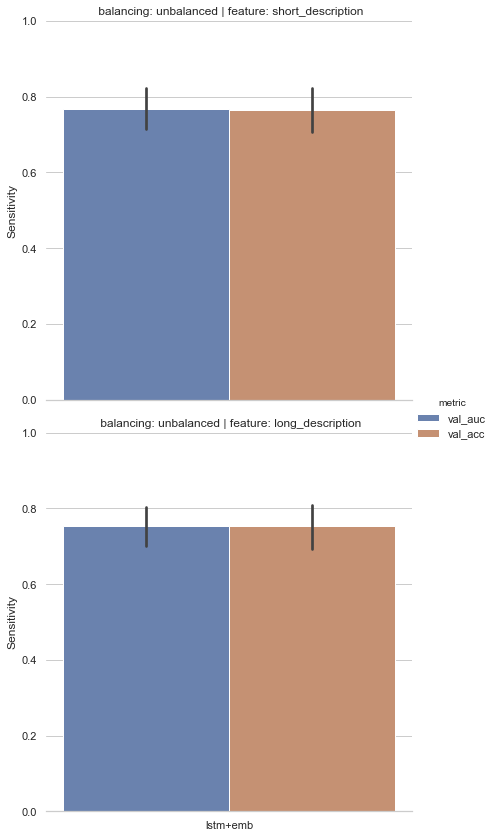

In [15]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=data_results
                , kind="bar"
                , x="classifier"
                , y="sensitivity"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Sensitivity")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

### Specificity ###
Corresponde à taxa de acerto na classe negativa: TN/(TN+FP). 

<Figure size 432x288 with 0 Axes>

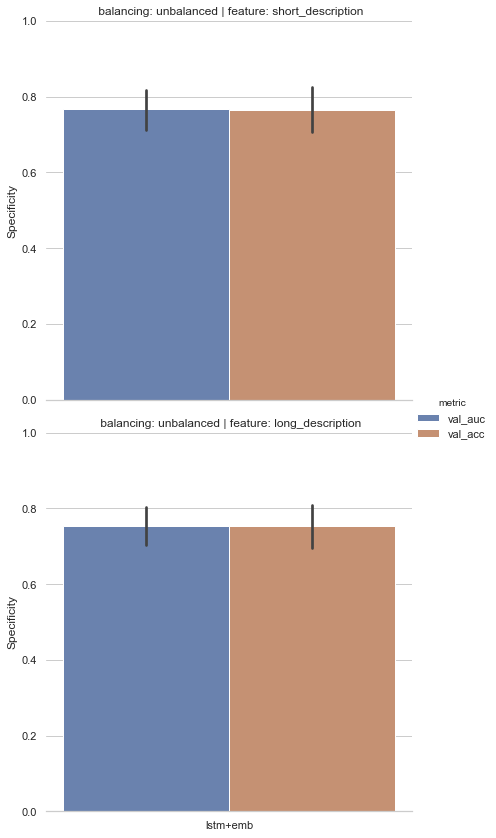

In [16]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=data_results
                , kind="bar"
                , x="classifier"
                , y="specificity"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Specificity")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

### Balanced Accuracy
Accurácia balanceada: (sensitivity + specificity)/2

<Figure size 432x288 with 0 Axes>

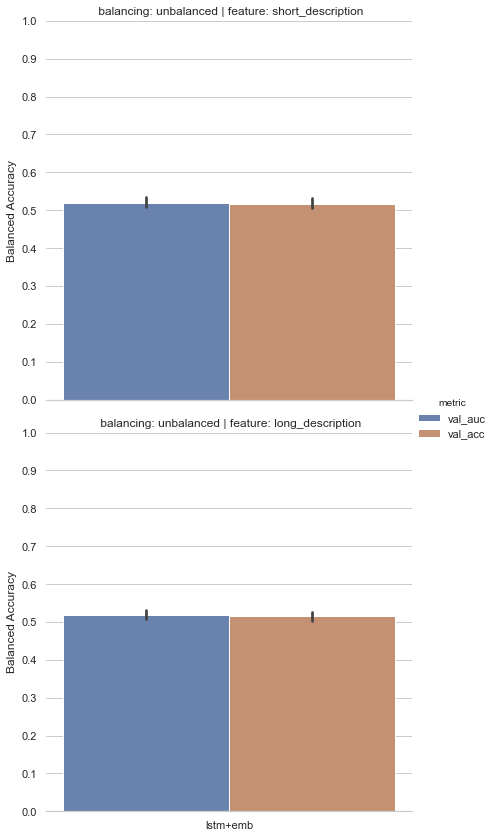

In [17]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=data_results
                , kind="bar"
                , x="classifier"
                , y="balanced_acc"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Balanced Accuracy")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(yticks=np.arange(0, 1.1, 0.1))
  .set(ylim=(0, 1))
  .despine(left=True))

## 3.3 Statistical Test

### Balanced Accuracy 

In [20]:
# read data per classifier
knn = e1_metrics_data[e1_metrics_data['classifier'] == 'knn'].balanced_acc
nb  = e1_metrics_data[e1_metrics_data['classifier'] == 'nb'].balanced_acc
nn  = e1_metrics_data[e1_metrics_data['classifier'] == 'nn'].balanced_acc
rf  = e1_metrics_data[e1_metrics_data['classifier'] == 'rf'].balanced_acc
svm = e1_metrics_data[e1_metrics_data['classifier'] == 'svm'].balanced_acc

# compare samples with Friedman Test
stat, p = kruskal(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=6.604, p=0.158
Same distributions (fail to reject H0)


### Sensitivity

In [21]:
# read data per classifier
knn = e1_metrics_data[e1_metrics_data['classifier'] == 'knn'].sensitivity
nb  = e1_metrics_data[e1_metrics_data['classifier'] == 'nb'].sensitivity
nn  = e1_metrics_data[e1_metrics_data['classifier'] == 'nn'].sensitivity
rf  = e1_metrics_data[e1_metrics_data['classifier'] == 'rf'].sensitivity
svm = e1_metrics_data[e1_metrics_data['classifier'] == 'svm'].sensitivity

# compare samples with Friedman Test
stat, p = kruskal(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=16.260, p=0.003
Different distributions (reject H0)


## 3.4. Test results

In [22]:
e1_tests_data = pd.read_csv(e1_tests_path)

In [23]:
bug_reports_data = pd.read_csv(bug_reports_path)
test_e1_merged_data = pd.merge(
    bug_reports_data,
    e1_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)

In [24]:
correct_predicted_bugs = test_e1_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,long_lived,y_hat
48,JSDT-212668,2007-12-11,General,JSDT,[hotbug] JavaScript validation error on JSPs,This is a follow-on to bug 207589:\n\nI just t...,nitind,kathy,fixed,1,resolved,4,2010-03-03,2,14,2009-02-12,429,normal,2,Y,Y
86,ASPECTJ-166347,2006-11-30,Docs,ASPECTJ,AspectJ website points to wrong version of ajd...,The AspectJ documentation http://www.eclipse.o...,aspectj-inbox,hlhawkins,fixed,1,resolved,4,2008-08-21,0,2,2008-08-21,630,normal,2,Y,Y
127,PLATFORM-56094,2004-03-25,SWT,PLATFORM,tracker resize uses screen coordinates instead...,No matter what you use in tracker's first argu...,grant_gayed,stromgt,fixed,1,resolved,4,2005-04-13,0,3,2005-04-13,384,normal,2,Y,Y
187,PLATFORM-213305,2007-12-18,SWT,PLATFORM,100% cpu usage on opening files with long lines.,Created attachment 85458\nA java source file f...,eclipse.felipe,mascha,fixed,1,resolved,4,2014-02-25,2,24,2009-02-04,414,normal,2,Y,Y
203,PLATFORM-31385,2003-02-07,SWT,PLATFORM,Redraw problems: selecting text backwards,eclipse 2.1I200302061700 linux-gtk j2sdk-1.4.1...,eclipse.felipe,nickell,fixed,1,resolved,4,2004-06-28,0,23,2004-06-28,507,normal,2,Y,Y


# 4. Second Experiment (RQ4.2)

## 4.1 Parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100, 150, 200, 250, 300       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 4.2 Review Data

In [25]:
e2_metrics_data.sort_values('balanced_acc', ascending=False).head()

,project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fp,tn,fn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
0,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,71,656,1565,116,0.379679,0.704638,0.542158,0.542158,0.097662,0.379679,0.155361
1,eclipse,long_description,150,nn,smote,repeatedcv,Accuracy,365,12926,6700,6226,2421,2233,188,63,568,1665,125,0.335106,0.745634,0.540370,0.540370,0.099842,0.335106,0.153846
4,eclipse,long_description,300,nn,smote,repeatedcv,Accuracy,365,12966,6729,6237,2432,2243,189,45,411,1832,144,0.238095,0.816763,0.527429,0.527429,0.098684,0.238095,0.139535
2,eclipse,long_description,200,nn,smote,repeatedcv,Accuracy,365,12954,6717,6237,2426,2238,188,49,475,1763,139,0.260638,0.787757,0.524198,0.524198,0.093511,0.260638,0.137640
3,eclipse,long_description,250,nn,smote,repeatedcv,Accuracy,365,12963,6726,6237,2429,2241,188,44,439,1802,144,0.234043,0.804105,0.519074,0.519074,0.091097,0.234043,0.131148


## 4.3 Evaluation Metrics

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


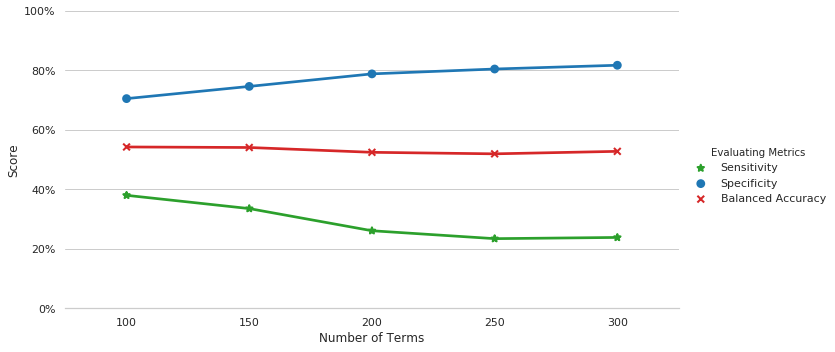

In [26]:
from  matplotlib.ticker import PercentFormatter
sns.set_context("paper")
sns.set(style="whitegrid", font_scale=1.0)
e2_metrics_data_melted = e2_metrics_data[['n_term', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['n_term']) 

g = sns.catplot(data=e2_metrics_data_melted
                , kind="point"
                , x="n_term"
                , y="value"
                , hue="variable"
                , saturation=.0
                , height=6
                , size=5
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"]
                , markers=["*", "o", "x"]
                #, linestyles=["-", "--", "dotted"]
                , legend_out=True)

(g.set_axis_labels("Number of Terms", "Score")
  .set_titles(" Balanced Accuracy: Neural Network")
  .set(ylim=(0, 1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
g.savefig(f"figures/rq4e2-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [27]:
from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker

def plot_line(x_ticks, x_label, experiment, data, id_var):
    sns.set_context("paper")
    sns.set(style="ticks", color_codes=True)
    e2_metrics_data_melted = data[[id_var, 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=[id_var]) 

    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='sensitivity'], label="Sensitivity", marker='*', markerfacecolor='tab:green', markersize=8, color='tab:green', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='specificity'], label="Specificity", marker='o', markerfacecolor='tab:blue',  markersize=8, color='tab:blue', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='balanced_acc'], label="Balanced Accuracy", marker='x',markerfacecolor='tab:red',   markersize=8, color='tab:red', linewidth=2)
    sns.despine(offset=5)

    ax = plt.axes()
    
    plt.xticks(x_ticks)
    plt.xlabel(x_label, fontsize=SMALL_SIZE)
    
    plt.yticks(fontsize=SMALL_SIZE)
    plt.ylabel('Score', fontsize=SMALL_SIZE)
    plt.ylim(0, 1)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

    plt.title("Eclipse: Evaluation Metrics", fontsize=SMALL_SIZE)
    plt.legend()
    plt.savefig(f"figures/rq4e{experiment}-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


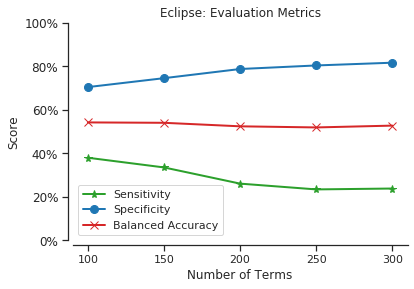

In [28]:
plot_line([100, 150, 200, 250, 300], "Number of Terms", "2", e2_metrics_data, "n_term")

## 4.4 Test Results

In [29]:
e2_tests_data = pd.read_csv(e2_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e2_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e2_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,long_lived,y_hat
48,JSDT-212668,2007-12-11,General,JSDT,[hotbug] JavaScript validation error on JSPs,This is a follow-on to bug 207589:\n\nI just t...,nitind,kathy,fixed,1,resolved,4,2010-03-03,2,14,2009-02-12,429,normal,2,Y,Y
86,ASPECTJ-166347,2006-11-30,Docs,ASPECTJ,AspectJ website points to wrong version of ajd...,The AspectJ documentation http://www.eclipse.o...,aspectj-inbox,hlhawkins,fixed,1,resolved,4,2008-08-21,0,2,2008-08-21,630,normal,2,Y,Y
127,PLATFORM-56094,2004-03-25,SWT,PLATFORM,tracker resize uses screen coordinates instead...,No matter what you use in tracker's first argu...,grant_gayed,stromgt,fixed,1,resolved,4,2005-04-13,0,3,2005-04-13,384,normal,2,Y,Y
187,PLATFORM-213305,2007-12-18,SWT,PLATFORM,100% cpu usage on opening files with long lines.,Created attachment 85458\nA java source file f...,eclipse.felipe,mascha,fixed,1,resolved,4,2014-02-25,2,24,2009-02-04,414,normal,2,Y,Y
203,PLATFORM-31385,2003-02-07,SWT,PLATFORM,Redraw problems: selecting text backwards,eclipse 2.1I200302061700 linux-gtk j2sdk-1.4.1...,eclipse.felipe,nickell,fixed,1,resolved,4,2004-06-28,0,23,2004-06-28,507,normal,2,Y,Y


# 5. Third Experiment (RQ4.3)

## 5.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        1, 8, 63, 365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 5.2 Review Data

In [30]:
e3_metrics_data.sort_values('balanced_acc', ascending=False).head()

,project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fp,tn,fn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
0,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,1,9401,4348,5053,2408,724,1684,1183,439,285,501,0.702494,0.393646,0.548070,0.548070,0.729346,0.702494,0.715668
3,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,71,656,1565,116,0.379679,0.704638,0.542158,0.542158,0.097662,0.379679,0.155361
1,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,8,7227,3612,3615,2408,1203,1205,658,594,609,547,0.546058,0.506234,0.526146,0.526146,0.525559,0.546058,0.535613
2,eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,63,9039,5415,3624,2408,1805,603,103,269,1536,500,0.170813,0.850970,0.510891,0.510891,0.276882,0.170813,0.211282


## 5.3 Evaluation Metrics

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


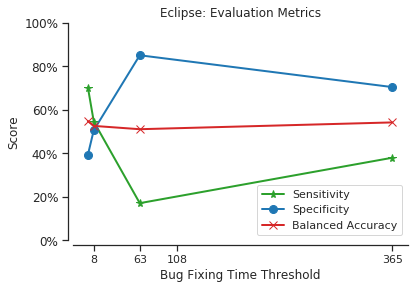

In [31]:
plot_line([8, 63, 108, 365], "Bug Fixing Time Threshold", "3", e3_metrics_data, "threshold")

## 5.4 Tests Results

In [32]:
e3_tests_data = pd.read_csv(e3_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e3_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e3_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

FileNotFoundError: [Errno 2] File b'datasets/20190925200836_rq4e3_eclipse_test_results_balanced_acc.csv' does not exist: b'datasets/20190925200836_rq4e3_eclipse_test_results_balanced_acc.csv'

# 6. Fourth Experiment

## 6.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse, Freedesktop, Gcc, Gnome, Mozilla, WineHQ       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**.

## 6.2 Review Data

In [ ]:
e4_metrics_data.sort_values('balanced_acc', ascending=False).head(6)

## 6.3 Evaluation Metrics

<Figure size 640x480 with 0 Axes>

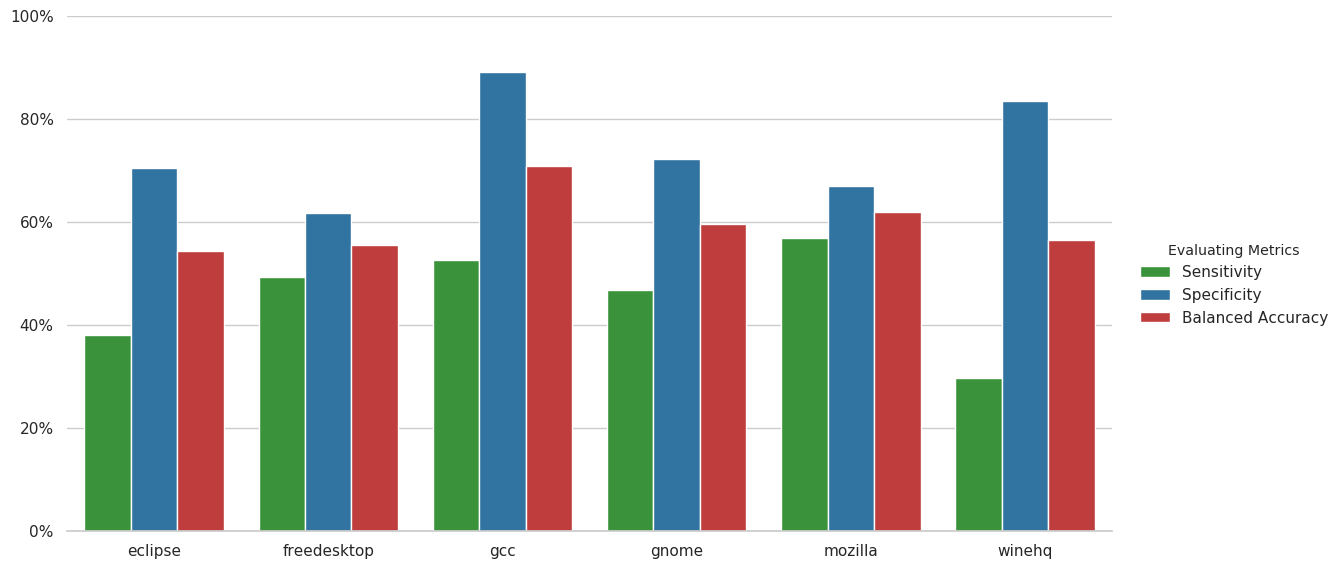

<Figure size 640x480 with 0 Axes>

In [39]:
sns.despine(offset=5)
sns.set(style="whitegrid")
e4_metrics_data_melted = e4_metrics_data[['project', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['project']) 
g = sns.catplot(data=e4_metrics_data_melted
                , kind="bar"
                , x="project"
                , y="value"
                , hue="variable"
                #, saturation=.5
                , height=6
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"])
(g.set_axis_labels("", "")
  .set_titles(" GCC: Neural Network Performance")
  .set(ylim=(0,1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
plt.savefig("figures/r4e4_performace_algorithms_on_eclipse_dataset.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [34]:
from pandas import DataFrame

metrics = {'dataset': ['Eclipse', 'Freedesktop', 'Gnome', 'Mozilla', 'Gcc', 'WineHQ'],
        '% of Long-Lived Bugs': [7.7, 13.6, 14.4, 18.1, 29.2, 40.7],
        'Balanced Accuracy (%)': [54.21, 55.44, 59.48, 61.84, 70.77, 56.46]}

df = DataFrame(metrics)

print (df) 

       dataset  % of Long-Lived Bugs  Balanced Accuracy (%)
0      Eclipse                   7.7                  54.21
1  Freedesktop                  13.6                  55.44
2        Gnome                  14.4                  59.48
3      Mozilla                  18.1                  61.84
4          Gcc                  29.2                  70.77
5       WineHQ                  40.7                  56.46


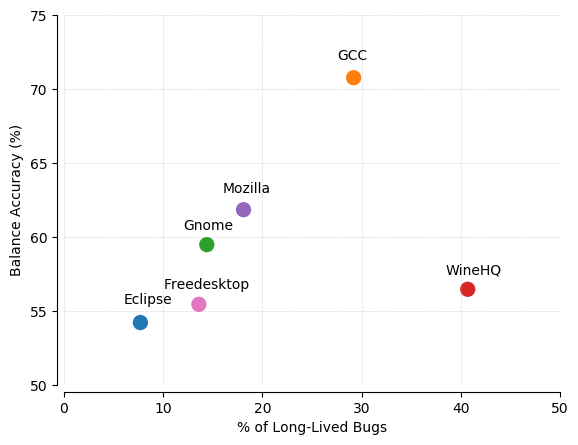

In [35]:
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')

x=df['% of Long-Lived Bugs']
y=df['Balanced Accuracy (%)']

plt.scatter(x, y, s=100, color=['tab:blue', 'tab:pink', 'tab:green', 'tab:purple', 'tab:orange', 'tab:red'])
plt.xlim(0,50)
plt.ylim(50, 75)
plt.text(6, 55.5, 'Eclipse')
plt.text(10, 56.5, 'Freedesktop')
plt.text(12, 60.5, 'Gnome')
plt.text(16, 63.0, 'Mozilla')
plt.text(27.5, 72, 'GCC')
plt.text(38.5, 57.5, 'WineHQ')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('% of Long-Lived Bugs')
plt.ylabel('Balance Accuracy (%)')

sns.despine(offset=5, trim=True)


## 6.4 Tests Results

In [36]:
e4_tests_data = pd.read_csv(e4_tests_path)
bug_reports_data = pd.read_csv(bug_reports_gcc_path)
test_e4_merged_data = pd.merge(
    bug_reports_data,
    e4_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e4_merged_data.query('long_lived == "Y" and y_hat == "N"')
#correct_predicted_bugs.head()
correct_predicted_bugs.groupby('long_lived')['long_lived'].agg(['count'])

FileNotFoundError: [Errno 2] File b'datasets/rq4e4_gcc_tests_balanced_acc.csv' does not exist: b'datasets/rq4e4_gcc_tests_balanced_acc.csv'